#  The Sparks - Data Science & Business Analytics Intership

## TASK - 2 Prediction using Unsupervised Machine Learning

### Step :

###  Author Sagar Meena

## STEP 1 : Importing the Dataset

In [28]:
# Importing the Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans


In [5]:
# reading Data iris dataset
df = pd.read_csv('iris.csv')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## STEP 2 : Visualising the data

In [7]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
df.shape

(150, 5)

In [9]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
# now we will drop the label column because it is an Unsupervised learning problem
iris = pd.DataFrame(df)
iris_df = iris.drop(columns = ['species'])

In [16]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Finding the optimum number of clusters

## Brief about Elbow method

In [24]:
# Calculating the "with-in cluster sum of square"
within_cluster_sum_of_square = []

cluster_range = range(1,15)
for k in cluster_range:
    km = KMeans(n_clusters = k)
    km = km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)

C:\Users\JCS\AppData\Local\conda\conda\envs\rpp\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


C:\Users\JCS\AppData\Local\conda\conda\envs\rpp\lib\site-packages\ipykernel_launcher.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  


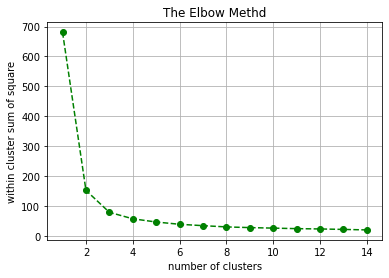

In [29]:
# Calculating the "with-in cluster sum of square" against cluster range
plt.plot(cluster_range , within_cluster_sum_of_square , 'go--' ,color='green')
plt.title('The Elbow Methd')
plt.xlabel('number of clusters')
plt.ylabel('within cluster sum of square')
plt.grid()
plt.show()


## STEP - Applying k means clustering on the data

In [30]:
from sklearn.cluster import KMeans

In [33]:
model = KMeans(n_clusters = 3 , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
predictions = model.fit_predict(iris_df)

## STEP 5 : Visualising the clusters

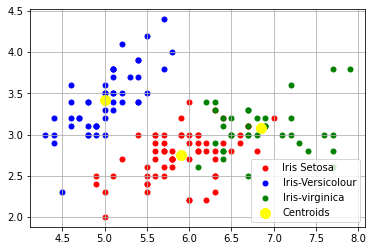

In [35]:
x = iris_df.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions == 0 , 0] , x[predictions == 0 ,1] ,s = 25 , c = 'red' ,label = 'Iris Setosa' )
plt.scatter(x[predictions == 1 , 0] , x[predictions == 1 ,1] ,s = 25 , c = 'blue' ,label = 'Iris-Versicolour')
plt.scatter(x[predictions == 2 , 0] , x[predictions == 2 ,1] ,s = 25 , c = 'green' ,label = 'Iris-virginica')

# plotting the cluster centers
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[: , 1] ,s = 100 , c = 'yellow' ,label = 'Centroids')
plt.legend()
plt.grid()
plt.show()